In [290]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

data=pd.read_csv('../input/heartdisease-2/heart_disease.csv')
labels=data.values[:,-1]
labels[labels>2]=2
labels=labels.astype(int)

data=data.values[:,:-1]

In [291]:
data = (data - np.mean(data, axis=0))/np.std(data, axis=0)

In [292]:
data = np.column_stack((data, np.ones(data.shape[0])))

In [293]:
def visualize(data,labels,w):
    color=['#1f77b4', '#ff7f0e', '#2ca02c']
    data_v=data[:,[3,7]]
    w_v = w[:,[3,7,-1]]
    def separator_points(w_v):
        l = -w_v[1] / (w_v[2]**2 + w_v[0]**2)
        x0 = np.array([l * w_v[2], l * w_v[0]])
        v = np.array([-w_v[0], w_v[2]])
        return np.stack([x0 + 100*v, x0 - 100*v])
    plt.scatter(data_v[:, 0],data_v[:, 1],c=labels)
    plt.xlim([np.amin(data_v[:, 0]),np.amax(data_v[:, 0])])
    plt.ylim([np.amin(data_v[:, 1]),np.amax(data_v[:, 1])])
    s = separator_points(w_v)
    plt.plot(s[:, 0], s[:, 1], '-')
    plt.legend()
    plt.title('Decision boundaries')
    plt.show()

In [294]:
def softmax(pred):
    p_pred = np.exp(pred - np.max(pred, axis = 1, keepdims = True))
    return p_pred / np.sum(p_pred, axis = 1, keepdims = True)

def log_softmax(pred):
    pred = pred - np.max(pred, axis = 1, keepdims = True)
    return pred - np.log(np.sum(np.exp(pred), axis = 1, keepdims = True))

In [295]:
class SoftmaxRegression():
    def __init__(self):
        self.w_hat = None
        
    def fit(self,data,labels,test_data,test_labels,acc_train,acc_test,iterations,max_iterations=500):
        num_classes = 3
        threshold = 1e-3
        alpha = 0.01
        Y = np.zeros((len(labels), num_classes))
        Y[np.arange(len(labels)), labels.astype(int)] = 1
        Y_test = np.zeros((len(test_labels), num_classes))
        Y_test[np.arange(len(test_labels)), test_labels.astype(int)] = 1
        self.w_hat = np.random.randn(num_classes,data.shape[1])
        for it in range(max_iterations):
            self.w_hat = self.w_hat - alpha*(self.error_gradient(data, Y))
            acc_train.append(self.accuracy(self.predict(data),labels))
            acc_test.append(self.accuracy(self.predict(test_data),test_labels))
            iterations.append(it)
            if it%50==0 or it==max_iterations-1:
                print(f"In iteration {it} error is: {self.error(data,Y)}")
                visualize(data,labels,self.w_hat)
            if self.error(data,Y) < threshold:
                break
    
    def error(self,data,true):
        return (-log_softmax(data @ self.w_hat.T) * true).sum(axis=1).mean(axis=0)
    
    def error_gradient(self,data,true):
        return np.einsum('ij,ik->jk',(softmax(data @ self.w_hat.T) - true), data) / data.shape[0]
    
    def predict(self,data):
        return np.argmax(softmax(data @ self.w_hat.T), axis=1)
    
    def accuracy(self, prediction, true):
        return np.count_nonzero(prediction == true.flatten()) / prediction.shape[0]

In [296]:
def train_test_split(data, labels):
    mask = np.random.rand(len(data)) <= 0.8
    training_data = data[mask]
    testing_data = data[~mask]
    training_labels = labels[mask]
    testing_labels = labels[~mask]

    print(f"No. of training examples: {training_data.shape[0]}")
    print(f"No. of testing examples: {testing_data.shape[0]}")
    print(f"No. of training examples: {training_labels.shape[0]}")
    print(f"No. of testing examples: {testing_labels.shape[0]}")
    return training_data, testing_data, training_labels, testing_labels

No. of training examples: 243
No. of testing examples: 60
No. of training examples: 243
No. of testing examples: 60
In iteration 0 error is: 3.4572787104276963


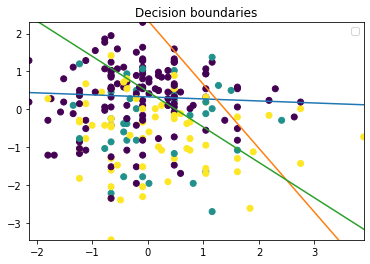

In iteration 50 error is: 2.767958226707602


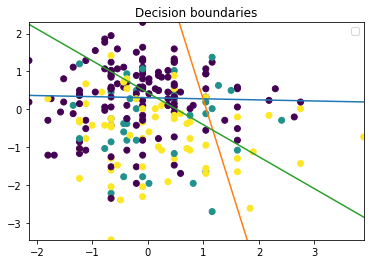

In iteration 100 error is: 2.28665547621507


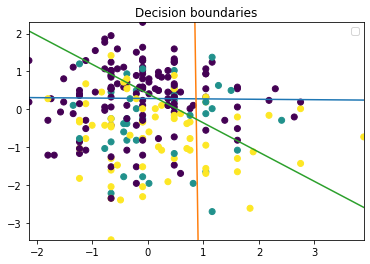

In iteration 150 error is: 1.9683917710552001


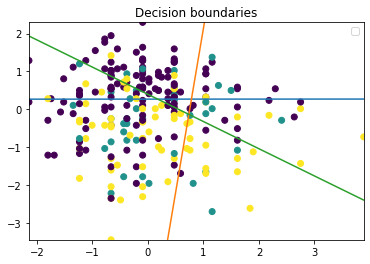

In iteration 200 error is: 1.752622432765178


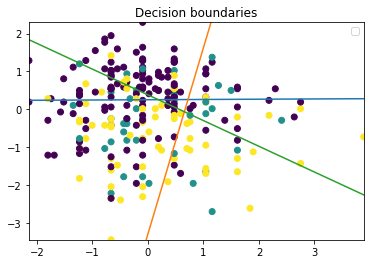

In iteration 250 error is: 1.5947638883270596


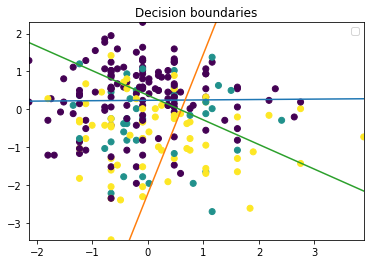

In iteration 300 error is: 1.4712611616247386


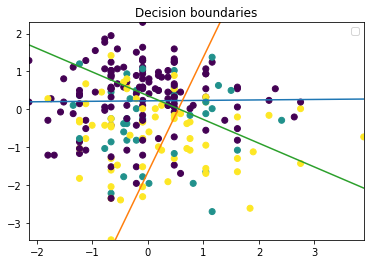

In iteration 350 error is: 1.3704067702248226


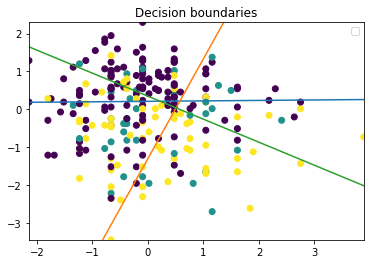

In iteration 400 error is: 1.2859114136172756


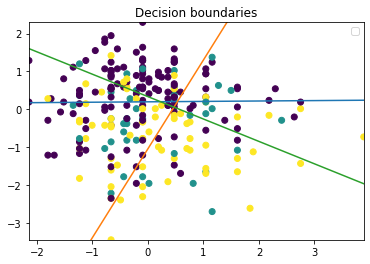

In iteration 450 error is: 1.213917239362748


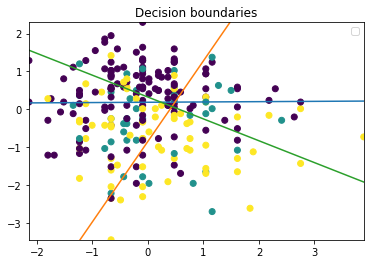

In iteration 499 error is: 1.1529594070715754


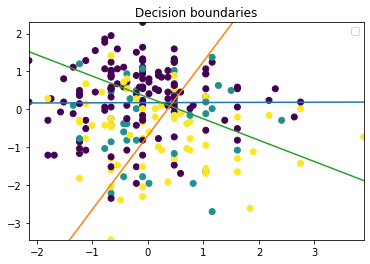

0.6748971193415638
0.7


In [297]:
train_data,test_data,train_labels,test_labels = train_test_split(data,labels)
sr=SoftmaxRegression()
acc_train = []
acc_test = []
iterations = []
sr.fit(train_data,train_labels,test_data,test_labels,acc_train,acc_test,iterations)
prediction_in=np.round(sr.predict(train_data))
prediction_out=np.round(sr.predict(test_data))
print(sr.accuracy(train_labels,prediction_in))
print(sr.accuracy(test_labels,prediction_out))

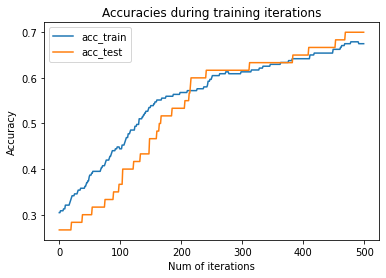

In [298]:
plt.plot(iterations,acc_train,label='acc_train')
plt.plot(iterations,acc_test,label='acc_test')
plt.title('Accuracies during training iterations')
plt.xlabel('Num of iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()